In [40]:
from sklearn.datasets import load_iris
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [41]:
# Load data
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [42]:
# Train
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
print(f"Accuracy: {model.score(X_test, y_test):.2f}")

Accuracy: 0.97


# Hyperparameter Tuning
## GridSearchCV

In [44]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [45]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

In [46]:
# Fit the model
grid_search.fit(X_train, y_train)
# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best CV Accuracy: 0.9557312252964426


In [47]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9210526315789473


## RandomizedSearchCV


In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

In [49]:
# Define parameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),  # Range: 0.6-1.0
    'colsample_bytree': uniform(0.6, 0.4)
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Test accuracy
best_model_rs = random_search.best_estimator_
y_pred_rs = best_model_rs.predict(X_test)
print("Test Accuracy (Randomized):", accuracy_score(y_test, y_pred_rs))

Best Parameters: {'colsample_bytree': np.float64(0.9754210836063001), 'learning_rate': np.float64(0.010233629752304298), 'max_depth': 6, 'n_estimators': 70, 'subsample': np.float64(0.8469926038510867)}
Best CV Accuracy: 0.9557312252964426
Test Accuracy (Randomized): 0.9210526315789473


# Visualization

<Figure size 1000x600 with 0 Axes>

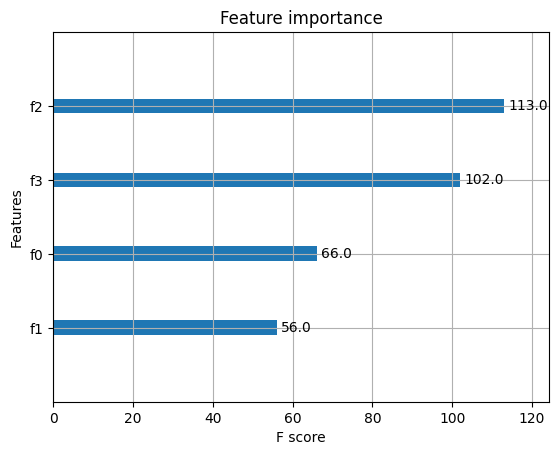

In [50]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(best_model)
plt.show()